# General Stuff

Python imports go here!

In [1]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import pandas as pd
import requests
import math

The next cell downloads the 'formatted_flights.csv' from source and stores it locally. Done purely for convenience. Skip it if file already exists!

In [2]:
flights_url = 'https://github.com/WillKoehrsen/Data-Analysis/raw/master/univariate_dist/data/formatted_flights.csv'
res = requests.get(flights_url, allow_redirects=True)
open('formatted_flights.csv', 'wb').write(res.content)

10420748

# Homework Part 1: Finding the Most Punctual Airline

## Data Import & Exploratory Data Analysis

At first, import the 'formatted_flights.csv' into a dataframe 'flights_df' and do some cleanup.

In [3]:
def load_flights_df():
  flights_df = pd.read_csv('formatted_flights.csv')
  flights_df = flights_df.drop(flights_df.columns[0], axis=1)
  return flights_df

flights_df = load_flights_df()

Afterwards let's visualize the first 10 results as table.

In [4]:
flights_df.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


Draw some histogram like recommended in the medium article.

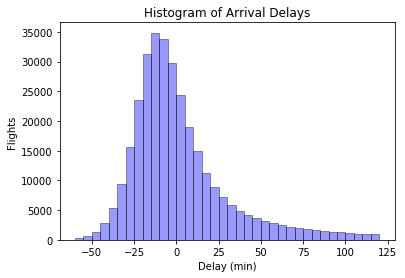

In [5]:
def draw_basic_histogram(flights_df):
  # seaborn histogram
  sns.distplot(flights_df['arr_delay'], hist=True, kde=False, 
               bins=int(180/5), color = 'blue',
               hist_kws={'edgecolor':'black'})
  # Add labels
  plt.title('Histogram of Arrival Delays')
  plt.xlabel('Delay (min)')
  plt.ylabel('Flights')
  
draw_basic_histogram(flights_df)

## Let's go into more detail

In the next step we'll analyze the arrival probabilities for all airlines in the dataset. First of all a list of all airlines is needed.

In [6]:
airlines = list(flights_df['name'].unique())
airlines.sort()
airlines_df = pd.DataFrame(airlines)
airlines_df.columns = ['airline']
airlines_df

,airline
0,AirTran Airways Corporation
1,Alaska Airlines Inc.
2,American Airlines Inc.
3,Delta Air Lines Inc.
4,Endeavor Air Inc.
5,Envoy Air
6,ExpressJet Airlines Inc.
7,Frontier Airlines Inc.
8,Hawaiian Airlines Inc.
9,JetBlue Airways


Next let's visualize a density plot for every airline. This will help us determine most likely candidates for further analysis.

/home/ralph/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


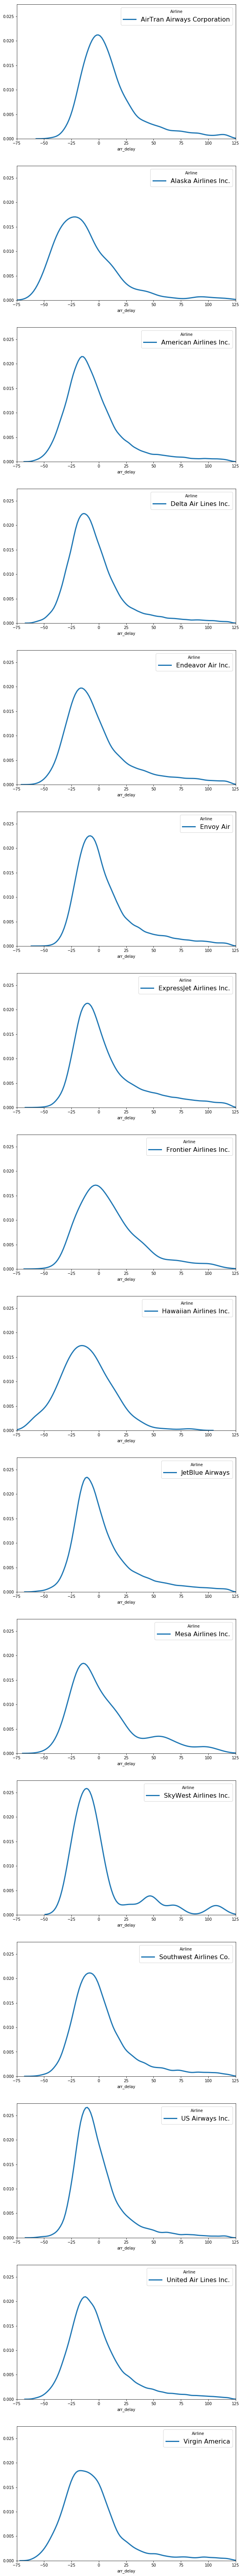

In [7]:
i = 0
plt.figure(figsize=(10,120))
for airline in airlines:
    ax = plt.subplot(len(airlines), 1, 1+i)
    # Subset to the airline
    subset = flights_df[flights_df['name'] == airline]
    
    # Draw the density plot
    f = sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    # Fix the plot dimensions to make the airlines easier comparable
    f.set(xlim=(-75, 125))
    f.set(ylim=(0, 0.0275))

    
    # Plot formatting
    ax.legend(prop={'size': 16}, title = 'Airline')
    #ax.title('Density Plot with Multiple Airlines')
    #ax.xlabel('Delay (min)')
    #ax.ylabel('Density')
    i = i+1

Let's take a look at the graphs. One thing that becomes apparent is that for some airlines like Alaska, American and Delta, the probabiltiy of delays beyond a certain threshold time drops nearly to zero. Let's examine a few of those closer! 

In [8]:
# Candidate airlines selected by looking at probability of delay threshold in graphs
candidate_airlines = [
    'Alaska Airlines Inc.', 
    'American Airlines Inc.', 
    'Delta Air Lines Inc.',
    'Hawaiian Airlines Inc.', 
    'US Airways Inc.', 
    'United Air Lines Inc.'
]
candidate_airlines

['Alaska Airlines Inc.',
 'American Airlines Inc.',
 'Delta Air Lines Inc.',
 'Hawaiian Airlines Inc.',
 'US Airways Inc.',
 'United Air Lines Inc.']

Let's plot them again, this time with the distplot option rug set to true.

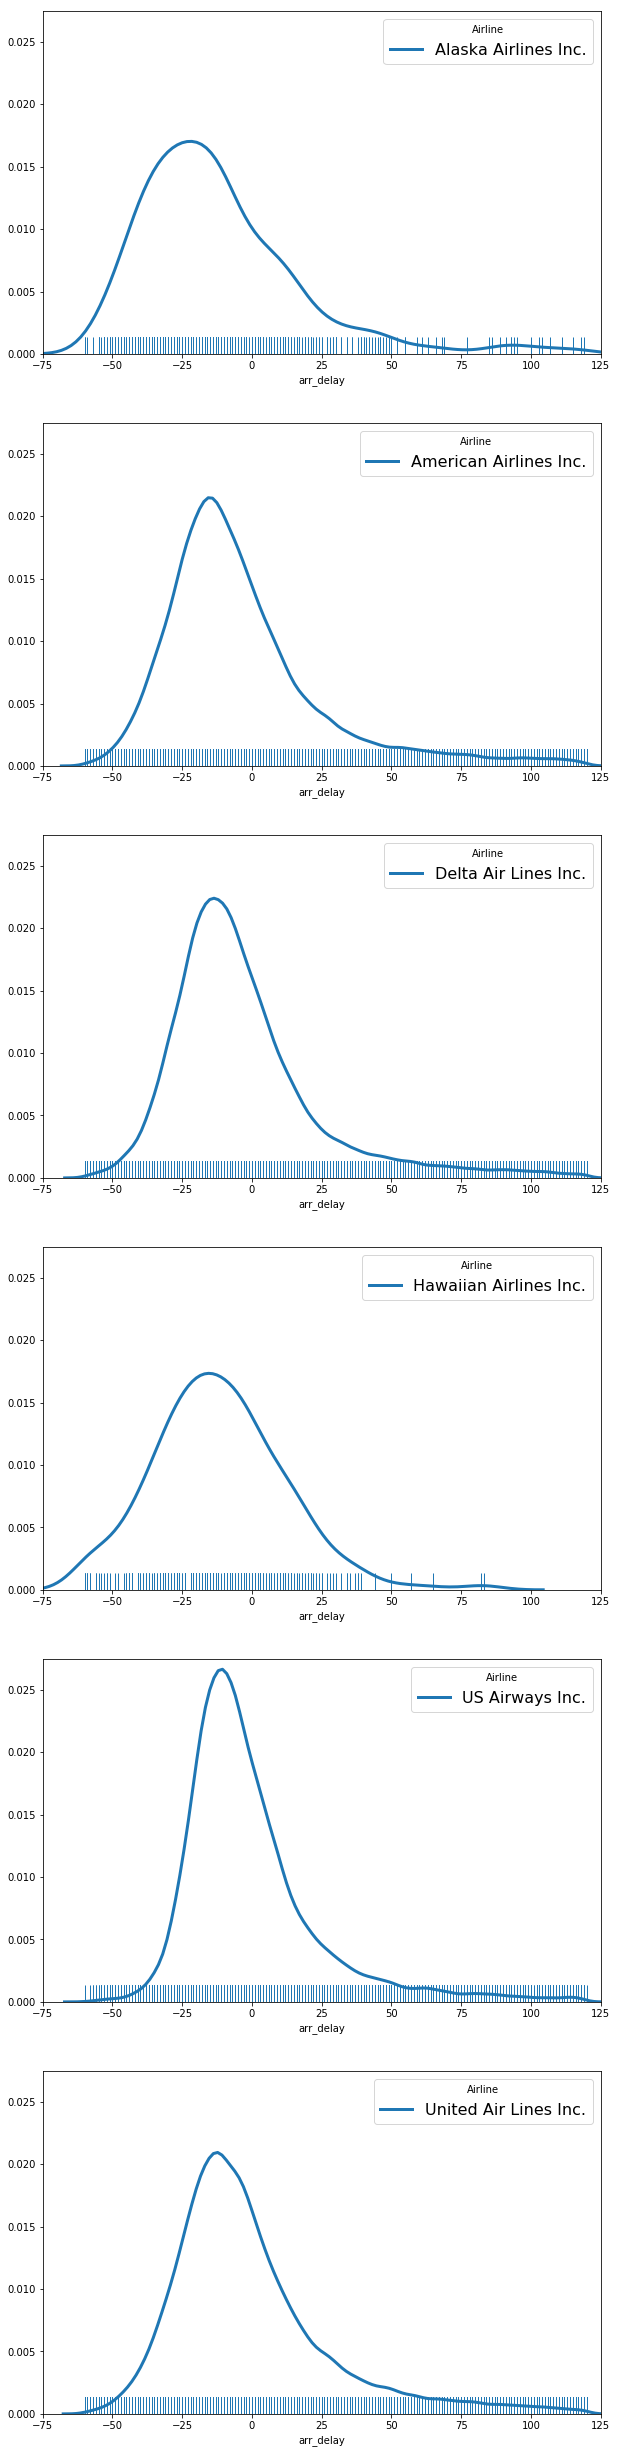

In [9]:
i = 0
plt.figure(figsize=(10,120))
for airline in candidate_airlines:
    ax = plt.subplot(len(airlines), 1, 1+i)
    # Subset to the airline
    subset = flights_df[flights_df['name'] == airline]
    
    # Draw the density plot
    f = sns.distplot(subset['arr_delay'], hist = False, kde = True,
                     rug = True, kde_kws = {'linewidth': 3},
                     label = airline)
    # Fix the plot dimensions to make the airlines easier comparable
    f.set(xlim=(-75, 125))
    f.set(ylim=(0, 0.0275))

    
    # Plot formatting
    ax.legend(prop={'size': 16}, title = 'Airline')
    #ax.title('Density Plot with Multiple Airlines')
    #ax.xlabel('Delay (min)')
    #ax.ylabel('Density')
    i = i+1

After examining those few carefully, one can spot a certain pattern in Alaska and Hawaiian.
What a rug plot does is that it displays more information about the distribution of data points.
In case of Alaska and particularly Hawaiian this means that even in the case of longer delays there are absolutely few instances of those.

So without further ado let's crown the winner which is...

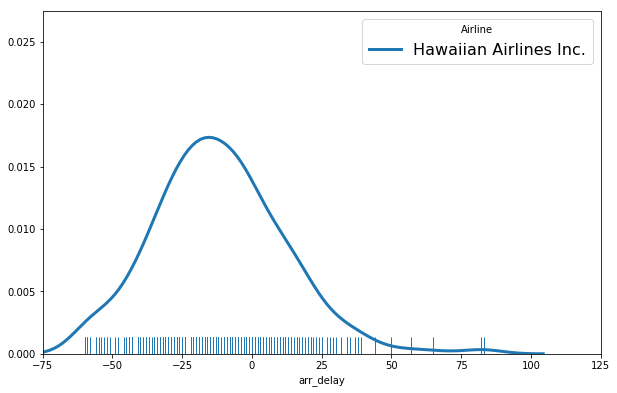

In [10]:
# The winner is...
airline = 'Hawaiian Airlines Inc.'

plt.figure(figsize=(10,120))
ax = plt.subplot(len(airlines), 1, 1+i)
# Subset to the airline
subset = flights_df[flights_df['name'] == airline]

# Draw the density plot
f = sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 rug = True, kde_kws = {'linewidth': 3},
                 label = airline)
# Fix the plot dimensions to make the airlines easier comparable
f.set(xlim=(-75, 125))
f.set(ylim=(0, 0.0275))


# Plot formatting
ax.legend(prop={'size': 16}, title = 'Airline')
#ax.title('Density Plot with Multiple Airlines')
#ax.xlabel('Delay (min)')
#ax.ylabel('Density')

**Hawaiian Airlines Inc!**

To further validate our results we can use some Critical Thinking.
Some quick Google Fu leads to this recent Forbes article which seems to pretty much confirm this research.

https://www.forbes.com/sites/ericrosen/2018/01/10/airlines-with-the-best-on-time-records/#46b8638c4b21

# Homework Part 2: The Math Stuff

Now let's have a look at the more math-related issues.

First of all, let's define some helper methods to prepare appropriate sample data & metrics.

In [11]:
airline_df = flights_df[flights_df['name'] == 'Hawaiian Airlines Inc.']

In [12]:
def take_samples(num_samples):
    return airline_df.sample(num_samples)

In [13]:
def measure_metrics(sample_df):
    mean = sample_df['arr_delay'].mean()
    std = sample_df['arr_delay'].std()
    return pd.DataFrame([{'num_samples': len(sample_df.index), 'mean': mean, 'std': std}])

Next, let's recall what the original distribution for just the selected airline data looked like.

,mean,num_samples,std
0,-11.608434,332,23.604822


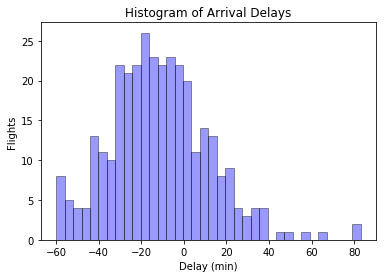

In [14]:
draw_basic_histogram(airline_df)
display(measure_metrics(airline_df))

Let's check whether this is Gaussian AKA a normal distribution.

At first glance, the histogram for the full data resembles the normal distribution, but then again it is not completely symmetric due to some outliers at the edges and a slight right-skew.

There are many different approaches for formally testing whether the full data is a normal distribution, I'm going use the QQ Plot Normality Check right now.

For a full list and more info about the how and why see https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/.

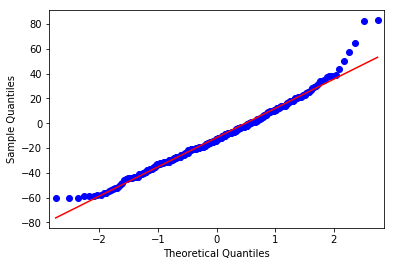

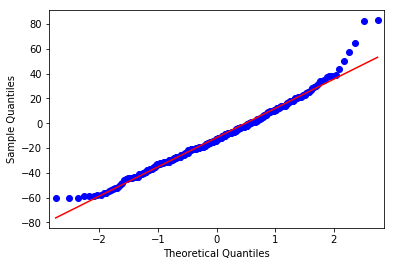

In [15]:
qqplot(airline_df['arr_delay'],line='s')

The QQ Plot clearly shows that the distribution for just the Hawaiian airline resembles Gaussian, but deviates slightly at the left and right edges of the examined values.
For now I'm just gonna assume this actually is Gaussian.

Let's calcuate mean and standard deviation for all data points.

In [16]:
metrics_population_df = measure_metrics(airline_df)
metrics_population_df

,mean,num_samples,std
0,-11.608434,332,23.604822


In [17]:
std_population = metrics_population_df['std'].values[0]
print('Standard Deviation of population: ', std_population)

Standard Deviation of population:  23.604821591641812


Next we gonna test the Central Limit Theorem with different sample sizes, let's start with say 10.

In [18]:
def calculate_metrics_for_many_samples(n, n_samples):
    # Stores metrics of mean and standard deviation for all samples of common size
    all_metrics = []
    for i in range(0, n_samples):
        sample_df = take_samples(n)
        all_metrics.append(measure_metrics(sample_df))
    all_metrics_df = pd.concat(all_metrics)
    return all_metrics_df

In [19]:
all_metrics_df = calculate_metrics_for_many_samples(10, 1000)

Let's have a quick look at a few of the metrics for n=10 in order to do quick comparison.

In [20]:
all_metrics_df.head(10)

,mean,num_samples,std
0,-8.4,10,12.712199
0,-8.7,10,19.493874
0,-5.9,10,19.104682
0,-12.1,10,16.162027
0,-16.8,10,28.603807
0,-16.9,10,20.631422
0,-11.3,10,20.515848
0,-11.2,10,17.389652
0,-1.1,10,34.818418
0,-7.4,10,15.875908


Let's calculate mean and standard deviation of the means for all samples.

In [21]:
print('Mean: ', all_metrics_df["mean"].mean())
print('Std. De. of Mean: ', all_metrics_df["mean"].std())

Mean:  -11.470899999999999
Std. De. of Mean:  7.395352217739493


Let's also calculate the standard deviation of the means using the formula:

In [22]:
std_population/math.sqrt(10)

7.4644999991509104

And plot the whole thing...

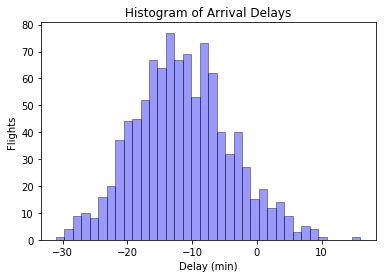

In [23]:
draw_basic_histogram(all_metrics_df.rename(index=str,columns={"mean":'arr_delay'}))

Do the same for n = 30.

In [24]:
all_metrics_df = calculate_metrics_for_many_samples(30, 1000)

Calculate mean and standard deviation again...

In [25]:
print('Mean: ', all_metrics_df["mean"].mean())
print('Std. De. of Mean: ', all_metrics_df["mean"].std())

Mean:  -11.37029999999998
Std. De. of Mean:  4.109437897605795


In [26]:
std_population/math.sqrt(30)

4.30963108387574

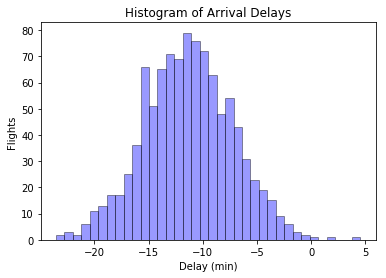

In [27]:
draw_basic_histogram(all_metrics_df.rename(index=str,columns={"mean":'arr_delay'}))

What now becomes apparent is that the bigger the sample size, the more closely the sample mean and standard deviation will reflect the actual mean. At at least n=30 the sample and full metrics are very close.

Also, we see multiple things here:

* the sampling distribution of the mean is less spread than in the actual population, see the histogram for the full data for a comparison
* the assumption that the sample distribution is well-related to the normal distribution is correct 
* the calculated mean gets close to the actual mean
* standard deviation of means gets lower with increased sample size AKA bigger samples lead to lower spread and are related to the spread of the population formula (see proof of formula above)

tl;dr: The histograms above are definitely normal distributions and the spread is definitely connected to the sample size (it decreases with increased sample size).